In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pulsar_data.csv to pulsar_data.csv


Dataset Loaded Successfully! Shape: (569, 30)

Starting Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters Found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

--- Final Model Performance ---
Accuracy: 0.9825

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



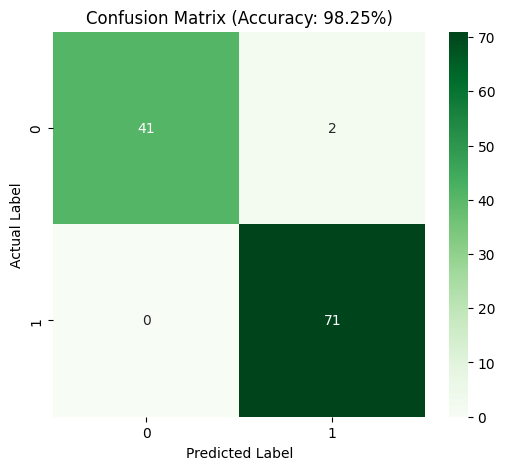

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. LOAD DATA (Internal Source - No CSV needed)
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame just for visualization (Optional)
df_feat = pd.DataFrame(X, columns=data.feature_names)
print(f"Dataset Loaded Successfully! Shape: {df_feat.shape}")

# 2. PREPROCESSING (StandardScaler is CRITICAL for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. HYPERPARAMETER TUNING (Grid Search)
print("\nStarting Grid Search...")

# Define the grid
# C: Controls the trade-off between smooth decision boundary and classifying training points correctly.
# Gamma: Defines how far the influence of a single training example reaches.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print(f"\nBest Parameters Found: {grid.best_params_}")

# 5. EVALUATION
y_pred = grid.predict(X_test)

print("\n--- Final Model Performance ---")
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 6. VISUALIZATION
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix (Accuracy: {acc:.2%})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()